In [113]:
import pandas as pd
import numpy as np
import glob
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
import warnings

%matplotlib inline
## make sure the plot is included as one part of the code, otherwise plots can be shown in a seperate window
## import all required modules for future use

In [2]:
all_files = glob.glob('**/*.csv',recursive=True)
## fetch all files ending with csv from the current directory

In [3]:
all_df = []
for f in all_files:
    df = pd.read_csv(f, sep=',')
    all_df.append(df)
## generate an empty list to store all csv files from the current directory

In [124]:
user=all_df[0]
test=all_df[1]
# Check uniqueness
print('Test ID:\t', len(test['user_id'].unique()), '\t', len(test['user_id'].unique()) == len(test))
print('User ID:\t', len(user['user_id'].unique()), '\t', len(user['user_id'].unique()) == len(user))

Test ID:	 452867 	 True
User ID:	 453321 	 True


In [4]:
df=all_df[0]
for df_temp in all_df[1:]:
    df = pd.merge(df,df_temp, on='user_id', how='outer')
## merge all csv files into a giant dataframe

In [5]:
df.drop_duplicates()
df.dropna(how='all')
## drop duplicates in the data and any event with missing values 

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test,sex,age,country
0,315281,2015-12-03,Direct,Web,ES,NaN,IE,1,0,M,32.0,Spain
1,497851,2015-12-04,Ads,Web,ES,Google,IE,0,1,M,21.0,Mexico
2,848402,2015-12-04,Ads,Web,ES,Facebook,Chrome,0,0,M,34.0,Spain
3,290051,2015-12-03,Ads,Mobile,Other,Facebook,Android_App,0,1,F,22.0,Mexico
4,548435,2015-11-30,Ads,Web,ES,Google,FireFox,0,1,M,19.0,Mexico
...,...,...,...,...,...,...,...,...,...,...,...,...
453316,425010,2015-12-04,SEO,Web,ES,NaN,FireFox,0,0,M,50.0,Mexico
453317,826793,2015-12-01,SEO,Mobile,ES,NaN,Android_App,0,1,F,20.0,Colombia
453318,514870,2015-12-02,Ads,Mobile,ES,Bing,Android_App,0,0,M,25.0,Spain
453319,785224,2015-12-04,SEO,Mobile,ES,NaN,Android_App,0,1,M,21.0,Colombia


In [6]:
df.describe()
## overview the basic statistcs from the data to see if any outliers exist in the data, it appears to me there is no obvious outlier
## in the dataframe. Next, we're going to examine the distribution of nationality with resepct to control and test groups. 

,user_id,conversion,test,age
count,453321.000000,453321.000000,453321.000000,452867.000000
mean,499937.514728,0.049579,0.476446,27.130740
std,288665.193436,0.217073,0.499445,6.776678
min,1.000000,0.000000,0.000000,18.000000
25%,249816.000000,0.000000,0.000000,22.000000
50%,500019.000000,0.000000,0.000000,26.000000
75%,749522.000000,0.000000,1.000000,31.000000
max,1000000.000000,1.000000,1.000000,70.000000


In [7]:
df_control=df[df['test']==0]
df_test=df[df['test']==1]
print(df_control.shape)
print(df_test.shape)
print(df_control.shape[0]+df_test.shape[0])
## select the control and test group from the dataframe, validate the shape of each dataframe aligns with the default setting

(237338, 12)
(215983, 12)
453321


In [8]:
c_country=df_control['country'].unique()
t_country=df_test['country'].unique()
## get the country names from each group and store them as lists, it will allow us to group results based on country names

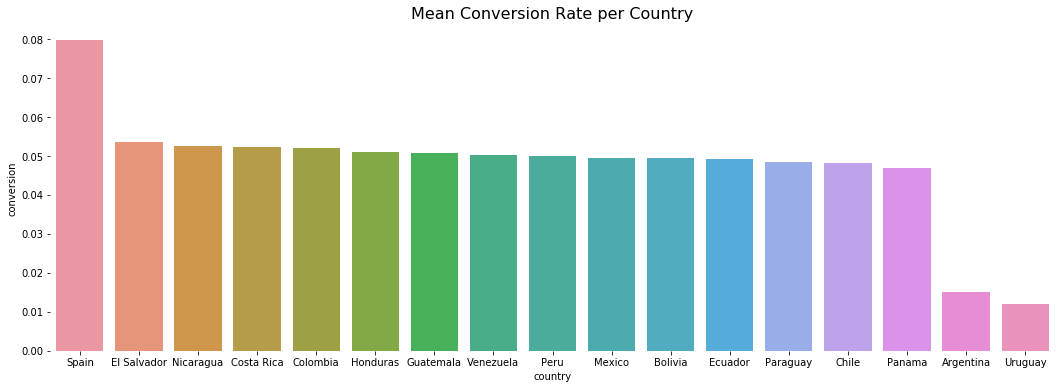

In [95]:
## first check if Spain converts much better than other LatAm countries
groupby_country = df[df['test'] == 0].groupby('country')[['conversion', 'country']].mean()
groupby_country = groupby_country.reset_index()
groupby_country = groupby_country.sort_values('conversion', ascending=False)

## visualization
fig, ax = plt.subplots(figsize=(18, 6))
sns.barplot(x='country', y='conversion', data=groupby_country, ax=ax)
for key,spine in ax.spines.items():
        spine.set_visible(False)
ax.set_title('Mean Conversion Rate per Country', fontsize=16)
plt.show()

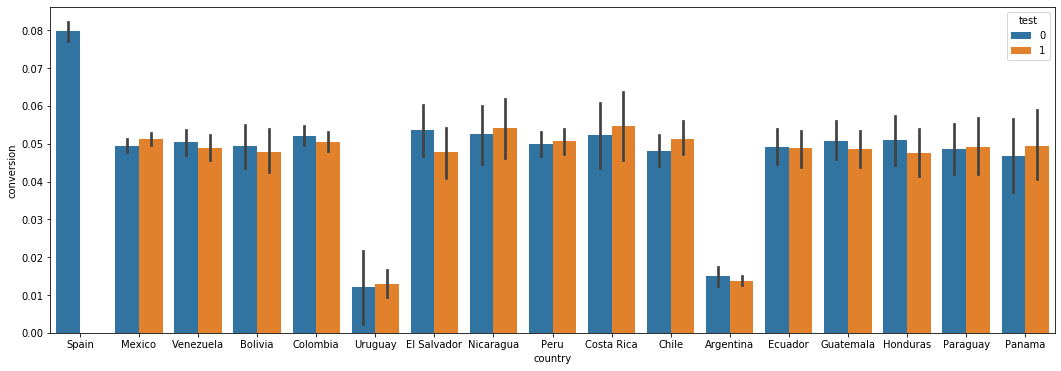

In [43]:
fig, ax = plt.subplots(figsize=(18, 6))
sns.barplot(x='country', y='conversion', hue='test', data=df, ax=ax)
plt.show()

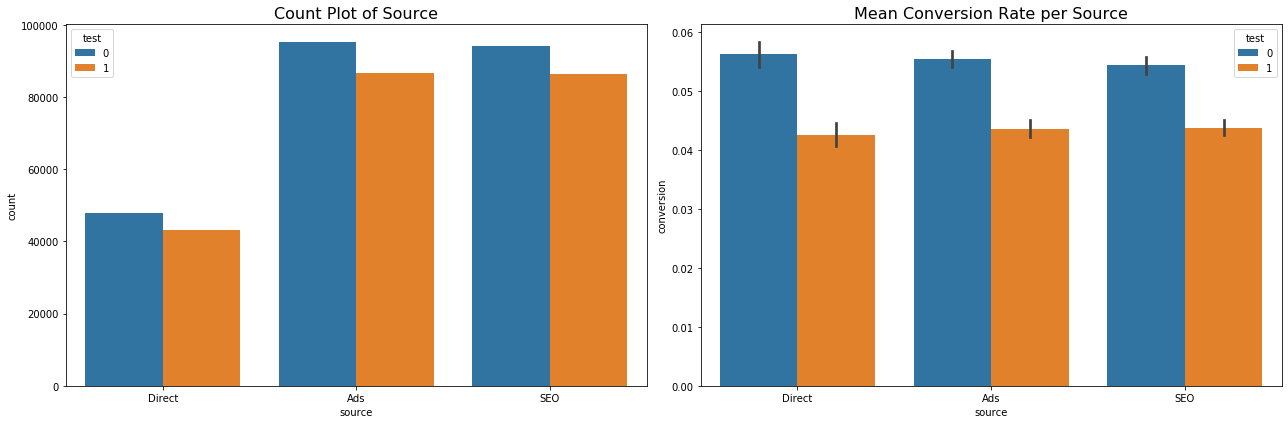

In [91]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.countplot(x='source', hue='test', data=df, ax=ax[0])
ax[0].set_title('Count Plot of Source', fontsize=16)

sns.barplot(x='source', y='conversion', hue='test', data=df, ax=ax[1]) ## specify the parameter in the dataframe, hue for different categories.
ax[1].set_title('Mean Conversion Rate per Source', fontsize=16)
plt.tight_layout()
plt.show()

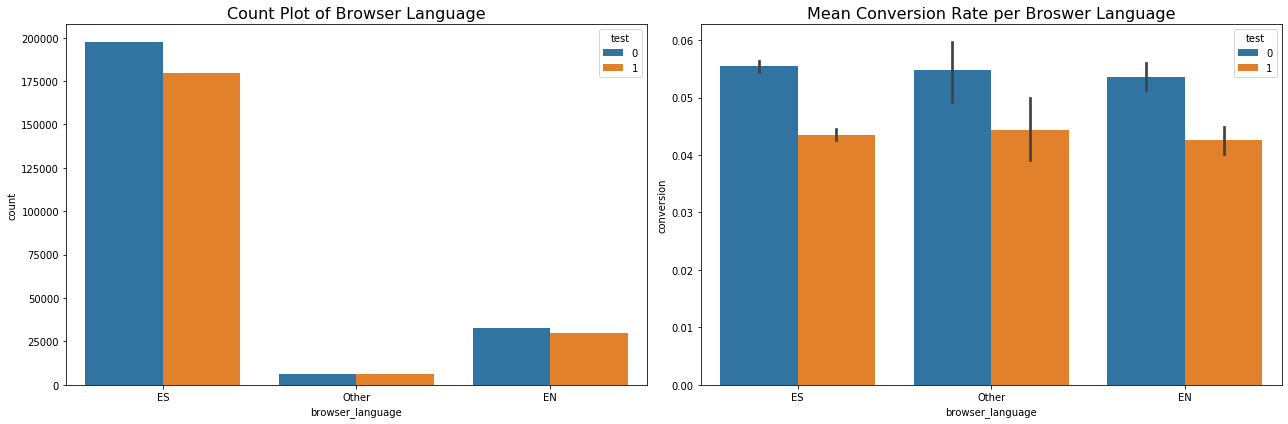

In [93]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.countplot(x='browser_language', hue='test', data=df, ax=ax[0])
ax[0].set_title('Count Plot of Browser Language', fontsize=16)

sns.barplot(x='browser_language', y='conversion', hue='test', data=df, ax=ax[1])
ax[1].set_title('Mean Conversion Rate per Broswer Language', fontsize=16)
plt.tight_layout()
plt.show()

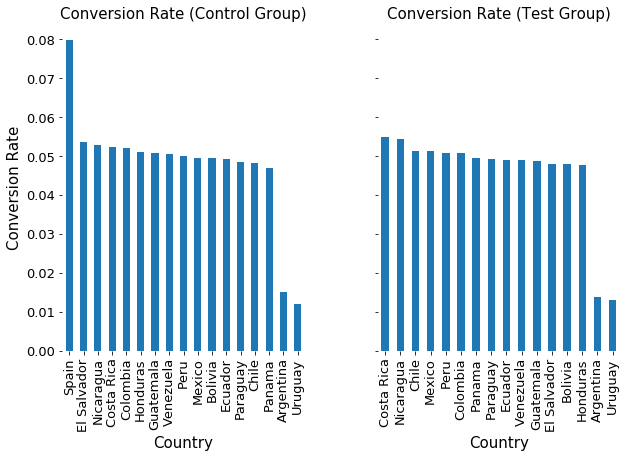

In [11]:
fig,axes =  plt.subplots(1,2,sharey=True)
df_list=[df_control,df_test]
group=['Control Group','Test Group']
for i in range(len(df_list)):
    mean_conversion_c=df_list[i].groupby(['country'])['conversion'].mean().sort_values(ascending=False) 
    mean_conversion_c.plot.bar(ax=axes[i],figsize=(10,6), fontsize=13)
    axes[i].set_alpha(0.8)
    axes[i].set_title("Conversion Rate ({})".format(group[i]), fontsize=15)
    axes[i].set_ylabel("Conversion Rate", fontsize=15)
    axes[i].set_xlabel("Country",fontsize=15)
    for key,spine in axes[i].spines.items():
        spine.set_visible(False)
    plt.xticks(rotation=90)
    fig.subplots_adjust(wspace=0.3)
## According to the plots, the bar plot shows that localized translation is not performing better than the non-localized version
## in terms of mean conversion rate. It's worth mentioning that the two plots share the same y axis. 

In [88]:
c_value=df_control[df_control['country']!='Spain']['conversion']
t_value=df_test['conversion']
print('the mean conversion rate in the control group is:{:50}'. format(c_value.mean()))
print('the mean conversion rate in the test group is:{:53}'. format(t_value.mean()))
stat=ttest_ind(t_value, c_value, equal_var=False).statistic
p_value=ttest_ind(t_value, c_value, equal_var=False).pvalue
print('statistc: {:20} p-value: {:20}'.format(stat,p_value))
## the p-value for testing independence assumption in both control and test group is less than 0.005, therefore, there is significant evidence 
## to believe the mean conversion rate is indeed different in both groups. 
## Also, the mean conversion rate in the test group is almost 0.012/0.055=10% lower than the mean conversion rate in the control group,
## In data science, results that are too bad to believe or too good to be true, they are not true. In a A/B test experiment, the most
## likely reasons are:
## 1 We don't collect enough data to draw valide conclusions from it
## 2 Some bias has been introduced in the experiment so that test/group people are not really random

the mean conversion rate in the control group is:                               0.04833042316066309
the mean conversion rate in the test group is:                                 0.043424713982118966
statistc:  -7.3939374121344805 p-value: 1.4282994754055316e-13


In [98]:
print(df['sex'].value_counts())
print(df['browser_language'].value_counts())
print(df['browser'].value_counts())
print(df['source'].value_counts())

M    264485
F    188382
Name: sex, dtype: int64
ES       377547
EN        63137
Other     12637
Name: browser_language, dtype: int64
Android_App    155135
Chrome         101929
IE              61715
Iphone_App      46621
Safari          41065
FireFox         40766
Opera            6090
Name: browser, dtype: int64
Ads       181877
SEO       180610
Direct     90834
Name: source, dtype: int64


In [103]:
## There are several possibilites that might lead to this phenomenon. First of all, as we can see in the chart, the main sources 
## Latin customers rely on are Ads and SEO, since the majority of them chose Spanish as the language for their browsers, they are more likely
## to receive Ads or relevant search query in Spanish, localized translation could potentially drive further customers away from
## their target, leading to the decreased conversion rate in the test group. 
print(df_test[df_test['browser_language']=='Other']['conversion'].mean())
## There is at least 0.1% increase due to the choice of browser languages as we see from the previous result.

0.0442798353909465


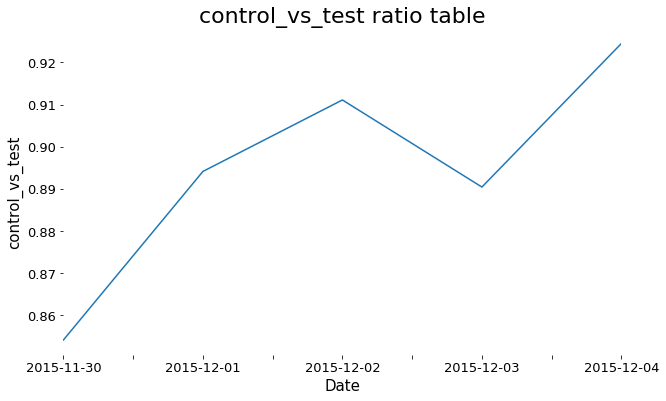

In [107]:
## Also, we can examine if there exists a temporal effect for the conversion rate difference in both groups. 
mean_conversion_c=df_control[df_control['country']!='Spain'].groupby(['date'])['conversion'].mean()
mean_conversion_t=df_test.groupby(['date'])['conversion'].mean()
ratio_rate=mean_conversion_t/mean_conversion_c
fig,axes =  plt.subplots(1,1)
ax = ratio_rate.plot(kind='line', figsize=(10,6), fontsize=13)
ax.set_alpha(0.8)
ax.set_title("test_vs_control ratio table", fontsize=22)
ax.set_ylabel("test_vs_control", fontsize=15)
ax.set_xlabel("Date",fontsize=15)
plt.xticks(rotation=0)
for key,spine in ax.spines.items():
        spine.set_visible(False)
plt.show()

In [111]:
## As we can see from this plot, mean conversion rate in control group is constantly better than  that in test group, therefore, 
## we can rule out the possible of not collecting enough data and turn our attention to the other possibility: bias in the A/B test 
## set up. If we have more data, we can generate plots with wider period, probably by weekly, monthly, yearly to further consolidate
## our conclusion. 

In [118]:
## run A/B test on mean conversion rate across countries expect Spain. 
df=df[df['country']!='Spain']
countries = [name for name in df['country'].unique() if name is not np.nan]

print('{0:15s} {1:>15s} {2:>15s} {3:>10s}'.format('Country', 'Test Rate', 'Control Rate', 'P-Value'))
print('-' * 58)
for country in countries:
    test_val = df[(df['country'] == country) & (df['test'] == 1)]['conversion'].values
    cont_val = df[(df['country'] == country) & (df['test'] == 0)]['conversion'].values
    test_mean = test_val.mean()
    cont_mean = cont_val.mean()
    p_val = ttest_ind(test_val, cont_val, equal_var=False).pvalue
    
    print('{0:15s} {1:15.5f} {2:15.5f} {3:10f}'.format(country, test_mean, cont_mean, p_val))

Country               Test Rate    Control Rate    P-Value
----------------------------------------------------------
Mexico                  0.05119         0.04949   0.165544
Venezuela               0.04898         0.05034   0.573702
Bolivia                 0.04790         0.04937   0.718885
Colombia                0.05057         0.05209   0.423719
Uruguay                 0.01291         0.01205   0.879764
El Salvador             0.04795         0.05355   0.248127
Nicaragua               0.05418         0.05265   0.780400
Peru                    0.05060         0.04991   0.771953
Costa Rica              0.05474         0.05226   0.687876
Chile                   0.05130         0.04811   0.302848
Argentina               0.01373         0.01507   0.335147
Ecuador                 0.04899         0.04915   0.961512
Guatemala               0.04865         0.05064   0.572107
Honduras                0.04754         0.05091   0.471463
Paraguay                0.04923         0.04849   0.8836

In [ ]:
## After we control for country, no significant results can be obtained by viewing the corresponding p-values. We can conclude the 
## localized translation can't promote sales in terms of conversion rate, but at least we know it doesn't make things worse. 